<a href="https://colab.research.google.com/github/AliBavarchee/LatentBoostClassifier/blob/main/HybridModelDemoNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

====================================<p align="Center">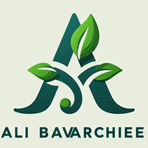</p>====================================
====
| https://github.com/AliBavarchee/ |
----

----

-----
# Hybrid Generative Model Demo: Training and Visualization of a CVAE+CGAN+RF Hybrid Model
-----

-<p align="Center">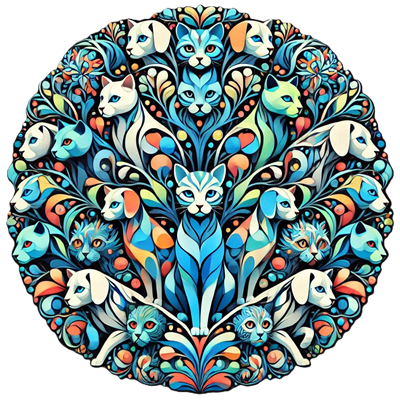</p>-

|https://github.com/AliBavarchee/LatentBoostClassifier|

# Generate synthetic classification data


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
# X: feature matrix with 6 features, Y: binary target variable (0 or 1)
X, Y = make_classification(
    n_samples=60,          # Number of samples
    n_features=6,          # Total number of features
    n_informative=4,       # Number of informative features
    n_redundant=2,         # Number of redundant features
    random_state=42        # Seed for reproducibility
)

# Ensure Y is binary (0 or 1)
Y = np.where(Y > 0, 1, 0)

# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
# 80% of the data will be used for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Install the LatentBoostClassifier package directly from the GitHub repository

In [ ]:
pip install git+https://github.com/AliBavarchee/LatentBoostClassifier.git

  Cloning https://github.com/AliBavarchee/LatentBoostClassifier.git to /tmp/pip-req-build-118qo4b5
  Running command git clone --filter=blob:none --quiet https://github.com/AliBavarchee/LatentBoostClassifier.git /tmp/pip-req-build-118qo4b5
  Resolved https://github.com/AliBavarchee/LatentBoostClassifier.git to commit a74c3cb4bea1fa66a1d1fefe7f5c9c22c9cf7e4e
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00
  Created wheel for LatentBoostClassifier: filename=LatentBoostClassifier-1.2.3-py3-none-any.whl size=409489 sha256=a1621dc282e9e921d962449032b783b6176e92ce80d6e42f67fe90d232b1e877
  Stored in directory: /tmp/pip-ephem-wheel-cache-fwap1502/wheels/64/f5/e8/224c5eea81ef454b5b7d52cafd2ce903261be16cfc7b4ba920
Successfully built LatentBoostClassifier


# Import the core functions from the LatentBoostClassifier package

In [ ]:
from LatentBoostClassifier import parallel_train, visualize_hybrid_model

# Verify the installation details of the LatentBoostClassifier package

In [ ]:
!pip show LatentBoostClassifier

Name: LatentBoostClassifier
Version: 1.2.3
Summary: A hybrid generative model combining CVAE, CGAN, and Random Forest.
Home-page: https://github.com/AliBavarchee/LatentBoostClassifier
Author: Ali Bavarchee
Author-email: ali.bavarchee@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras-tuner, matplotlib, numpy, pandas, scikit-learn, seaborn, tensorflow, tqdm
Required-by: 


# Train the hybrid model (CVAE, CGAN, and Random Forest) in parallel
The function returns the trained CVAE model, CGAN generator, and Random Forest model
====

Trial 90 Complete [00h 00m 08s]
loss: 2.3948209285736084

Best loss So Far: 2.3083362579345703
Total elapsed time: 00h 07m 52s
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.50      0.43      0.46         7

    accuracy                           0.42        12
   macro avg       0.42      0.41      0.41        12
weighted avg       0.43      0.42      0.42        12

Confusion Matrix:
[[2 3]
 [4 3]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


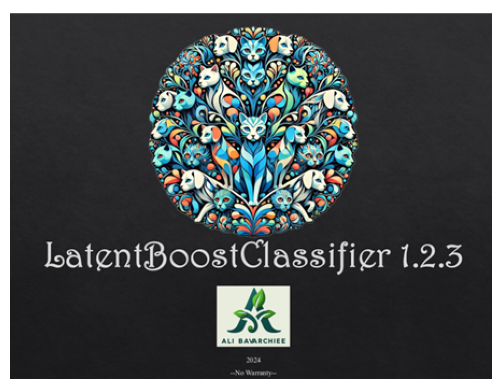

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
best_cvae, best_cgan_generator, best_rf_model = parallel_train(X_train, Y_train, X_test, Y_test)

# Visualize the results of the hybrid model, including:
 - Latent space visualization
 ===
 - Synthetic data comparison
 ===
 - Classification performance metrics
 ===

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.75      0.43      0.55         7

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12

Confusion Matrix:


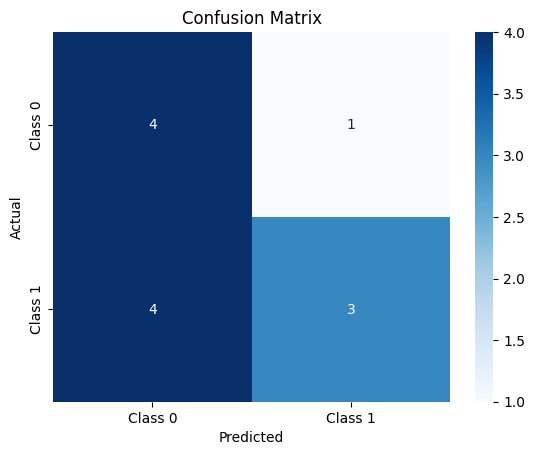

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


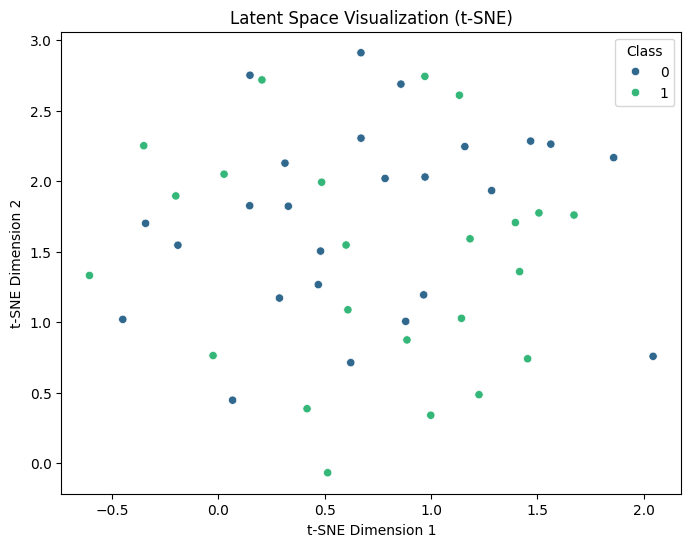

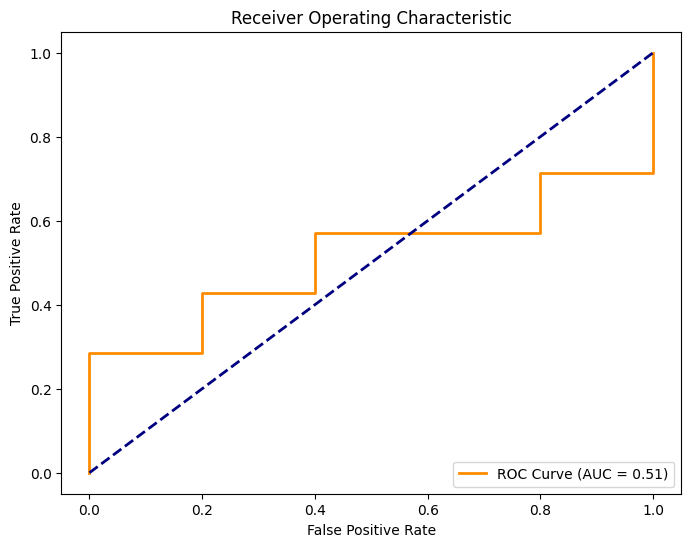

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


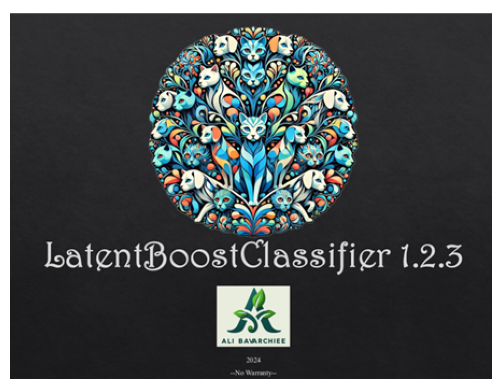

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
visualize_hybrid_model(best_cvae, best_cgan_generator, best_rf_model, X_test, Y_test, X_train, Y_train)